In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
INCIDENTS = '../dataset/data-raw/incidents.csv'
POVERTYYEAY = '../dataset/data-raw/povertyByStateYear.csv'
STATEDISHOUSE = '../dataset/data-raw/year_state_district_house.csv'

incidents = pd.read_csv(INCIDENTS)
poverty = pd.read_csv(POVERTYYEAY)
state_district_house = pd.read_csv(STATEDISHOUSE)

incidents['state'] = incidents['state'].str.upper()
poverty['state'] = poverty['state'].str.upper()
state_district_house['state'] = state_district_house['state'].str.upper()

/tmp/ipykernel_4296/2836909318.py:10: DtypeWarning: Columns (15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  incidents = pd.read_csv(INCIDENTS)


In [2]:
AGE_RANGE = (0,150)
def age_cleaning(age):
    try:
        if float(age) > AGE_RANGE[0] and float(age) < AGE_RANGE[1]:
            return float(age)
        else:
            return np.nan
    except:
        return np.nan

In [3]:
valid_districts = {}
for i in range(len(state_district_house)):
    state = state_district_house.loc[i, 'state']
    year = state_district_house.loc[i, 'year']
    district = state_district_house.loc[i, 'congressional_district']
    district = 1 if district == 0 else district
    if (state, year) not in valid_districts:
        valid_districts[(state, year)] = []
        valid_districts[(state, year+1)] = []
    valid_districts[(state, year)].append(district)
    valid_districts[(state, year+1)].append(district)

import math
def is_valid_district(state, year, district):
    if math.isnan(year):
        return True
    if (state, year) in valid_districts:
        return district in valid_districts[(state, year)]
    return False

In [4]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       239677 non-null  object 
 1   state                      239677 non-null  object 
 2   city_or_county             239677 non-null  object 
 3   address                    223180 non-null  object 
 4   latitude                   231754 non-null  float64
 5   longitude                  231754 non-null  float64
 6   congressional_district     227733 non-null  float64
 7   state_house_district       200905 non-null  float64
 8   state_senate_district      207342 non-null  float64
 9   participant_age1           147379 non-null  float64
 10  participant_age_group1     197558 non-null  object 
 11  participant_gender1        203315 non-null  object 
 12  min_age_participants       164879 non-null  object 
 13  avg_age_participants       16

In [18]:
incidents[(incidents['n_participants'] != 1) * (incidents['n_females'] != 0) * (incidents['n_males'] + incidents['n_females'] != incidents['n_participants'])].dropna()

,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,...,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2
677,2014-03-19,MICHIGAN,Melvindale,4125 Oakwood,42.2818,-83.1893,13.0,14.0,8.0,44.0,...,0.0,1.0,0,0,0.0,1.0,2.0,ar imp,Armed robbery with injury/death and/or evidenc...,Implied Weapon
826,2017-02-06,MISSISSIPPI,Pascagoula,934 Denny Ave,30.3705,-88.5482,4.0,110.0,52.0,21.0,...,0.0,1.0,0,0,1.0,1.0,2.0,"ALT: Hwy 90 and Market St, attempt ar with 22 ...",Institution/Group/Business,Non-Shooting Incident
1128,2017-11-01,ALABAMA,Anniston,High Street,33.6899,-85.8378,3.0,36.0,12.0,36.0,...,1.0,1.0,2,1,0.0,0.0,3.0,victim Candice Weeks AKA Candy Roper,Shot - Wounded/Injured,"Shot - Dead (murder, accidental, suicide)"
1181,2017-07-11,MISSOURI,Saint Louis,I-70,38.6448,-90.1824,1.0,78.0,5.0,48.0,...,0.0,1.0,0,3,0.0,0.0,3.0,"38.644775, -90.182351 ;",Shot - Wounded/Injured,"Drive-by (car to street, car to car)"
2086,2017-09-16,MISSOURI,Hermann,119 Bavarian Hills Blvd,38.6838,-91.4594,3.0,61.0,6.0,41.0,...,0.0,1.0,0,0,1.0,1.0,2.0,Employee subdued would-be armed robber without...,Institution/Group/Business,Non-Shooting Incident
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238004,2016-10-30,NEW YORK,Newburgh,119 First Street,41.5020,-74.0104,18.0,104.0,39.0,18.0,...,4.0,4.0,2,5,3.0,0.0,10.0,"Halloween party, open fire in crowd",Shot - Wounded/Injured,"Shot - Dead (murder, accidental, suicide)"
238240,2016-05-21,GEORGIA,Jackson,Levi Barnes Road,33.2598,-84.0274,10.0,129.0,25.0,16.0,...,2.0,1.0,1,3,0.0,0.0,4.0,"drive by mass shooting, exchange of gunfire, g...",Shot - Wounded/Injured,"Shot - Dead (murder, accidental, suicide)"
238280,2014-11-19,ILLINOIS,Chicago,6859 S. Loomis Blvd,41.7699,-87.6590,7.0,32.0,16.0,25.0,...,1.0,1.0,1,2,0.0,0.0,3.0,"Loomis Food Mart - woman killed, man critical,...",Shot - Wounded/Injured,"Shot - Dead (murder, accidental, suicide)"
238580,2014-09-17,MISSOURI,Jennings,Old Lucas and Hunt and Tyrell,38.7192,-90.2604,1.0,74.0,14.0,42.0,...,1.0,1.0,1,0,0.0,3.0,4.0,Police responded to a call of a man threatenin...,"Shot - Dead (murder, accidental, suicide)",Officer Involved Incident


In [33]:
a = incidents.loc[238240]
a

date                                                                2016-05-21
state                                                                  GEORGIA
city_or_county                                                         Jackson
address                                                       Levi Barnes Road
latitude                                                               33.2598
longitude                                                             -84.0274
congressional_district                                                    10.0
state_house_district                                                     129.0
state_senate_district                                                     25.0
participant_age1                                                          16.0
participant_age_group1                                              Teen 12-17
participant_gender1                                                       Male
min_age_participants                                

In [54]:
# Date cleaning
noerr_incidents = pd.DataFrame()
noerr_incidents['date'] = pd.to_datetime(incidents['date'])
noerr_incidents['date_year'] = noerr_incidents['date'].dt.year
noerr_incidents['date_month'] = noerr_incidents['date'].dt.month
noerr_incidents['date_day'] = noerr_incidents['date'].dt.day
noerr_incidents.drop(columns=['date'], inplace=True)

noerr_incidents['date_year'] = noerr_incidents['date_year'].map(lambda x: np.nan if x > 2018 else x)


In [55]:
noerr_incidents['state'] = incidents['state']
noerr_incidents['latitude'] = incidents['latitude']
noerr_incidents['longitude'] = incidents['longitude']
noerr_incidents['congressional_district'] = incidents['congressional_district'].map(lambda x: 1 if x == 0 else x)
invalid_districts = ~noerr_incidents.apply(lambda row: is_valid_district(row['state'], row['date_year'], row['congressional_district']), axis=1)
# change the value of congressional_district to nan where invalid_districts is true
noerr_incidents.loc[invalid_districts, 'congressional_district'] = np.nan

In [56]:
noerr_incidents['min_age_participants'] = incidents['min_age_participants'].map(age_cleaning)
noerr_incidents['avg_age_participants'] = incidents['avg_age_participants'].map(age_cleaning)
noerr_incidents['max_age_participants'] = incidents['max_age_participants'].map(age_cleaning)
noerr_incidents['n_males'] = incidents['n_males']
noerr_incidents['n_females'] = incidents['n_females']
noerr_incidents['n_killed'] = incidents['n_killed']
noerr_incidents['n_injured'] = incidents['n_injured']
noerr_incidents['n_arrested'] = incidents['n_arrested']
noerr_incidents['n_unharmed'] = incidents['n_unharmed']
noerr_incidents['n_participants'] = incidents['n_participants']


In [57]:
noerr_incidents = noerr_incidents[noerr_incidents['n_participants'] > 0]

In [67]:
noerr_incidents['r_males'] = noerr_incidents['n_males'] / noerr_incidents['n_participants']
noerr_incidents['r_females'] = noerr_incidents['n_females'] / noerr_incidents['n_participants']
noerr_incidents['r_killed'] = noerr_incidents['n_killed'] / noerr_incidents['n_participants']
noerr_incidents['r_injured'] = noerr_incidents['n_injured'] / noerr_incidents['n_participants']
noerr_incidents['r_arrested'] = noerr_incidents['n_arrested'] / noerr_incidents['n_participants']
noerr_incidents['r_unharmed'] = noerr_incidents['n_unharmed'] / noerr_incidents['n_participants']

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f1ee839f890>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f1ee8c72a50>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f1ee8532550>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f1ee8497610>}

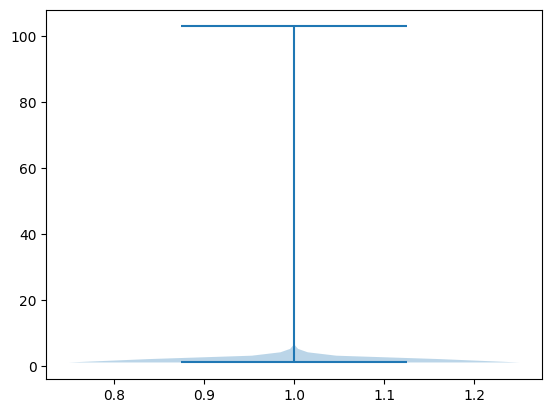

In [85]:
# a = noerr_incidents['r_arrested'].apply(lambda x: np.log(x + 1) if x + 1 > 0 else x)
plt.violinplot(noerr_incidents['n_participants'].dropna(), )

In [60]:
noerr_incidents.describe()

,date_year,date_month,date_day,latitude,longitude,congressional_district,min_age_participants,avg_age_participants,max_age_participants,n_males,...,n_injured,n_arrested,n_unharmed,n_participants,r_males,r_females,r_killed,r_injured,r_arrested,r_unharmed
count,191783.000000,214814.000000,214814.000000,207413.000000,207413.000000,202713.000000,147295.000000,147364.000000,147363.000000,203315.000000,...,214814.000000,212051.000000,212051.000000,214814.000000,203315.000000,203315.000000,214814.000000,214814.000000,212051.000000,214814.000000
mean,2015.860624,6.365819,15.776332,37.504254,-89.343030,8.081470,28.352673,30.000651,31.804089,1.520252,...,0.551184,0.468439,0.494169,1.826352,0.859242,0.103475,0.174051,0.337179,0.262393,0.174051
std,1.193657,3.453264,8.827408,5.068998,14.277555,8.518932,12.471330,12.442043,13.690482,0.996767,...,0.750324,0.851035,0.925566,1.185053,0.269616,0.243575,0.334378,0.415974,0.392607,0.334378
min,2013.000000,1.000000,1.000000,19.111400,-171.429000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,3.000000,8.000000,33.916600,-93.880000,2.000000,20.000000,21.000000,22.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.833333,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,6.000000,16.000000,38.468800,-86.274100,5.000000,25.000000,27.000000,28.000000,1.000000,...,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,9.000000,23.000000,41.319600,-80.050700,10.000000,34.000000,36.000000,38.000000,2.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.142857,0.666667,0.500000,0.142857
max,2018.000000,12.000000,31.000000,71.336800,-67.271100,53.000000,148.000000,148.000000,101.000000,61.000000,...,53.000000,63.000000,20.000000,103.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
# get all numeric columns
numeric_cols = ['min_age_participants', 'avg_age_participants', 'max_age_participants', 'n_males', 'n_females', 'n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'n_participants', 'r_males', 'r_females', 'r_killed', 'r_injured', 'r_arrested', 'r_unharmed']

len(numeric_cols)

16

In [66]:
# count nan values in each row
nan_count = noerr_incidents[numeric_cols].isna().sum(axis=1)
a = noerr_incidents[nan_count > 6]

In [8]:
import swifter

def fix_participants(row: pd.Series):
    tmp = row.copy()
    tmp['n_participants_child'] = float(tmp['n_participants_child'])
    tmp['n_participants_teen'] = float(tmp['n_participants_teen'])
    tmp['n_participants_adult'] = float(tmp['n_participants_adult'])
    # root: n_participants
    # n_participants <= n_males + n_females
    # n_participants <= n_participants_child + n_participants_teen + n_participants_adult
    # n_participants <= n_killed + n_injured + n_unharmed
    if tmp['n_participants'] == 0:
        tmp['n_participants'] = np.nan
        tmp['n_males'] = np.nan
        tmp['n_females'] = np.nan
        tmp['n_participants_child'] = np.nan
        tmp['n_participants_teen'] = np.nan
        tmp['n_participants_adult'] = np.nan
        tmp['n_killed'] = np.nan
        tmp['n_injured'] = np.nan
        tmp['n_unharmed'] = np.nan
        tmp['n_arrested'] = np.nan
        return tmp
    if tmp['n_participants'] != tmp['n_males'] + tmp['n_females']:
        if  tmp['n_males'] + tmp['n_females'] == 0:
            tmp['n_females'] = tmp['n_females'] = np.nan
        ratio_males = tmp['n_males'] / (tmp['n_males'] + tmp['n_females'])
        tmp['n_males'] = np.round(tmp['n_participants'] * ratio_males)
        tmp['n_females'] = np.round(tmp['n_participants'] * (1 - ratio_males))
    if tmp['n_participants'] != tmp['n_participants_child'] + tmp['n_participants_teen'] + tmp['n_participants_adult']:
        if tmp['n_participants_child'] + tmp['n_participants_teen'] + tmp['n_participants_adult'] == 0:
            tmp['n_participants_child'] = tmp['n_participants_teen'] = tmp['n_participants_adult'] = np.nan
        ratio_child = tmp['n_participants_child'] / (tmp['n_participants_child'] + tmp['n_participants_teen'] + tmp['n_participants_adult'])
        ratio_teen = tmp['n_participants_teen'] / (tmp['n_participants_child'] + tmp['n_participants_teen'] + tmp['n_participants_adult'])
        ratio_adult = tmp['n_participants_adult'] / (tmp['n_participants_child'] + tmp['n_participants_teen'] + tmp['n_participants_adult'])
        tmp['n_participants_child'] = np.round(tmp['n_participants'] * ratio_child)
        tmp['n_participants_teen'] = np.round(tmp['n_participants'] * ratio_teen)
        tmp['n_participants_adult'] = np.round(tmp['n_participants'] * ratio_adult)
    if tmp['n_participants'] != tmp['n_killed'] + tmp['n_injured'] + tmp['n_unharmed']:
        if tmp['n_killed'] + tmp['n_injured'] + tmp['n_unharmed'] == 0:
            tmp['n_killed'] = tmp['n_injured'] = tmp['n_unharmed'] = np.nan
        ratio_killed = tmp['n_killed'] / (tmp['n_killed'] + tmp['n_injured'] + tmp['n_unharmed'])
        ratio_injured = tmp['n_injured'] / (tmp['n_killed'] + tmp['n_injured'] + tmp['n_unharmed'])
        ratio_unharmed = tmp['n_unharmed'] / (tmp['n_killed'] + tmp['n_injured'] + tmp['n_unharmed'])
        tmp['n_killed'] = np.round(tmp['n_participants'] * ratio_killed)
        tmp['n_injured'] = np.round(tmp['n_participants'] * ratio_injured)
        tmp['n_unharmed'] = np.round(tmp['n_participants'] * ratio_unharmed)
    return tmp

a = incidents[['n_participants', 'n_males', 'n_females', 'n_participants_child', 'n_participants_teen', 'n_participants_adult', 'n_killed', 'n_injured', 'n_unharmed', 'n_arrested']].copy()

# change a column to float
a['n_participants_child'] = pd.to_numeric(a['n_participants_child'], errors='coerce')
a['n_participants_teen'] = pd.to_numeric(a['n_participants_teen'], errors='coerce')
a['n_participants_adult'] = pd.to_numeric(a['n_participants_adult'], errors='coerce')

%time b = a.swifter.apply(fix_participants, axis=1)




Dask Apply:   0%|          | 0/24 [00:00<?, ?it/s]

CPU times: user 716 ms, sys: 20.8 ms, total: 737 ms
Wall time: 26.1 s


In [ ]:
pd.plotting.scatter_matrix(b, alpha=0.2, figsize=(20, 20), diagonal='kde')

[Text(1, 0, 'n_participants'),
 Text(2, 0, 'n_males'),
 Text(3, 0, 'n_females'),
 Text(4, 0, 'n_participants_child'),
 Text(5, 0, 'n_participants_teen'),
 Text(6, 0, 'n_participants_adult'),
 Text(7, 0, 'n_killed'),
 Text(8, 0, 'n_injured'),
 Text(9, 0, 'n_unharmed'),
 Text(10, 0, 'n_arrested')]

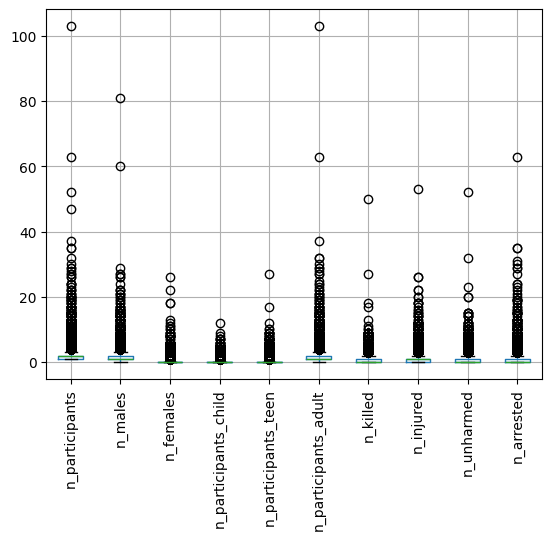

In [15]:
ax = pd.plotting.boxplot(b)
# rotate x_ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

0.6332230460160967


[Text(1, 0, 'n_participants'),
 Text(2, 0, 'n_males'),
 Text(3, 0, 'n_females'),
 Text(4, 0, 'n_participants_child'),
 Text(5, 0, 'n_participants_teen'),
 Text(6, 0, 'n_participants_adult'),
 Text(7, 0, 'n_killed'),
 Text(8, 0, 'n_injured'),
 Text(9, 0, 'n_unharmed'),
 Text(10, 0, 'n_arrested')]

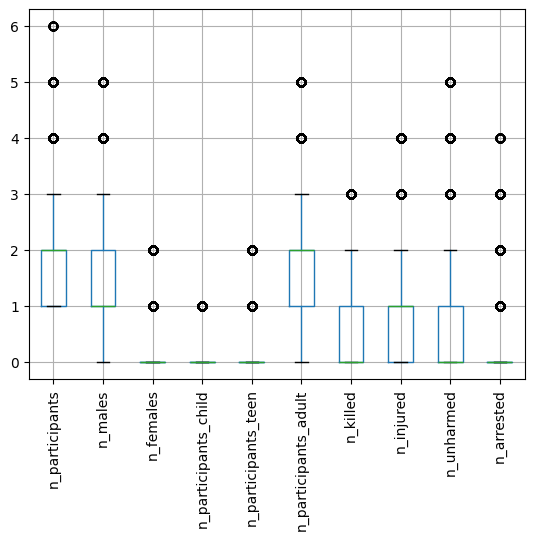

In [23]:
# compute the 95th percentile of all columns
percentile_95 = b.quantile(0.99)
percentile_95
# drop all rows where one column in the row is greater than the 95th percentile
c = b[(b <= percentile_95).all(axis=1)]

print(c.shape[0] / b.shape[0])

ax1 = pd.plotting.boxplot(c)
ax1.set_xticklabels(ax.get_xticklabels(), rotation=90)

array([[<Axes: xlabel='n_participants', ylabel='n_participants'>,
        <Axes: xlabel='n_males', ylabel='n_participants'>,
        <Axes: xlabel='n_females', ylabel='n_participants'>,
        <Axes: xlabel='n_participants_child', ylabel='n_participants'>,
        <Axes: xlabel='n_participants_teen', ylabel='n_participants'>,
        <Axes: xlabel='n_participants_adult', ylabel='n_participants'>,
        <Axes: xlabel='n_killed', ylabel='n_participants'>,
        <Axes: xlabel='n_injured', ylabel='n_participants'>,
        <Axes: xlabel='n_unharmed', ylabel='n_participants'>,
        <Axes: xlabel='n_arrested', ylabel='n_participants'>],
       [<Axes: xlabel='n_participants', ylabel='n_males'>,
        <Axes: xlabel='n_males', ylabel='n_males'>,
        <Axes: xlabel='n_females', ylabel='n_males'>,
        <Axes: xlabel='n_participants_child', ylabel='n_males'>,
        <Axes: xlabel='n_participants_teen', ylabel='n_males'>,
        <Axes: xlabel='n_participants_adult', ylabel='n_mal

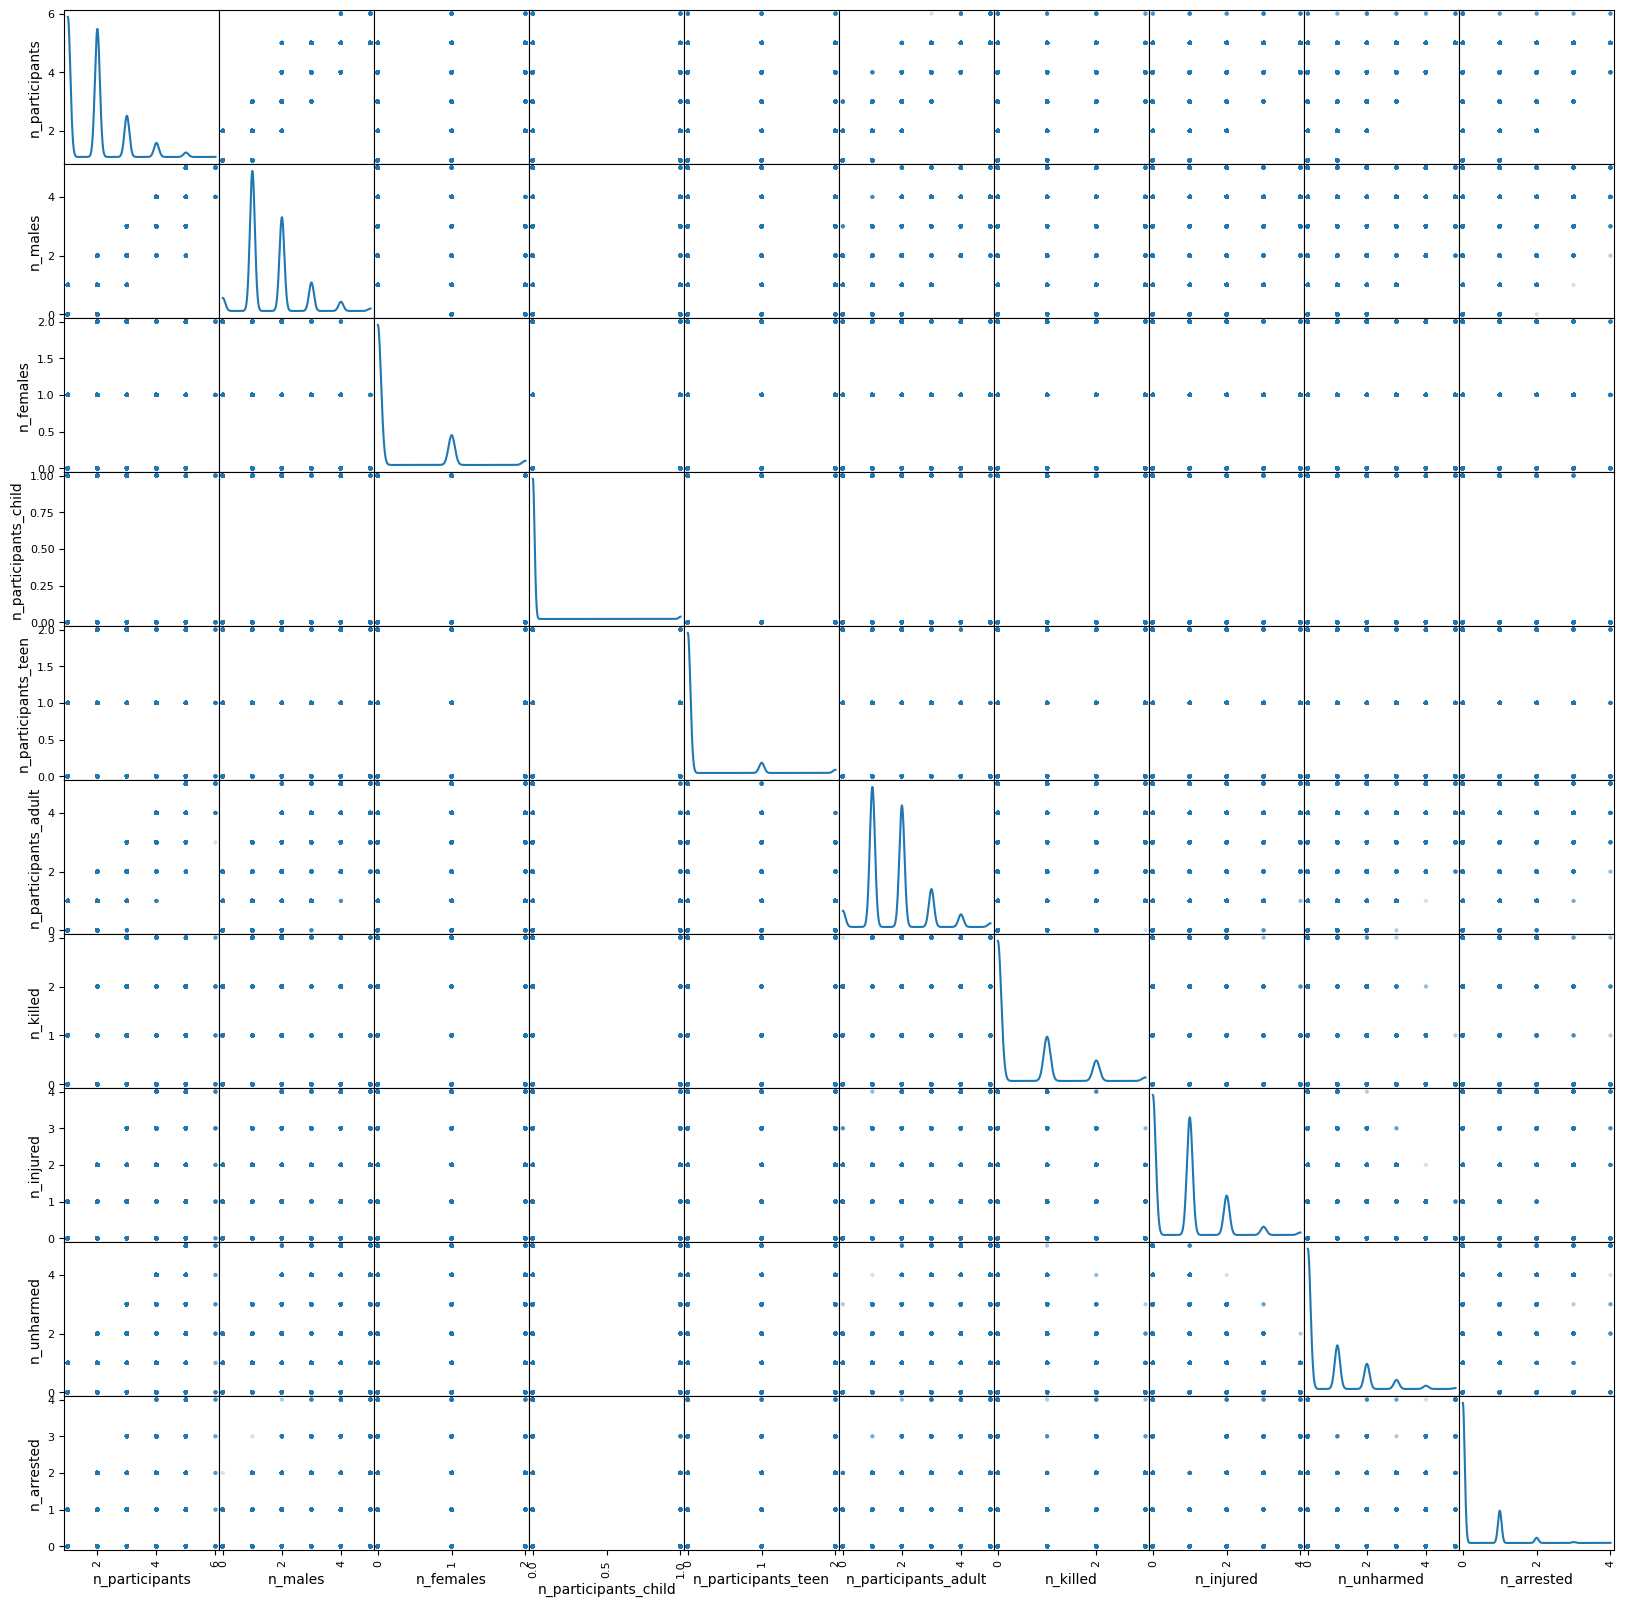

In [24]:
pd.plotting.scatter_matrix(c, alpha=0.2, figsize=(20, 20), diagonal='kde')


a = noerr_incidents[~(nan_count > 12)]
(a['n_participants'] == 0).sum()

mean = noerr_incidents[numeric_cols].mean(skipna=True)
std = noerr_incidents[numeric_cols].std(skipna=True)

noerr_incidents[numeric_cols] = noerr_incidents[numeric_cols].apply(lambda x: x.fillna(np.random.normal(loc=mean[x.name], scale=std[x.name])))

noerr_incidents[['r_males', 'r_females', 'r_killed', 'r_injured', 'r_arrested', 'r_unharmed']].boxplot()